<a href="https://colab.research.google.com/github/chidinmaquinn/DATASCIENCE/blob/main/Chidinma_N_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Assignment 1 - LINEAR REGRESSION

Import libraries


In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# Question 1

Loading Dataset


In [ ]:
# Load my dataset

data_m =pd.read_csv('/content/Housing_more.csv')

#checking for the first 5 rows
data_m.head()

,price,size,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
#checking the last 5 rows
data_m.tail()

,price,size,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


## Question 2: Exploring the data

In [ ]:
# An overwiew of the data
data_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   size              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# checking data type
data_m.dtypes

price                int64
size                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
#checking for the number of rows and columns
data_m.shape

(545, 13)

In [ ]:
#checking for the number of unique values
data_m.nunique()

price               219
size                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [ ]:
#checking for statistics
data_m.describe()

,price,size,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Question 3: Data preprocessing

Data cleaning

In [ ]:
# checking for missing values if there is any
data_m.isnull().sum()

price               0
size                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
#checking for duplicated values
data_m.duplicated().sum()

0

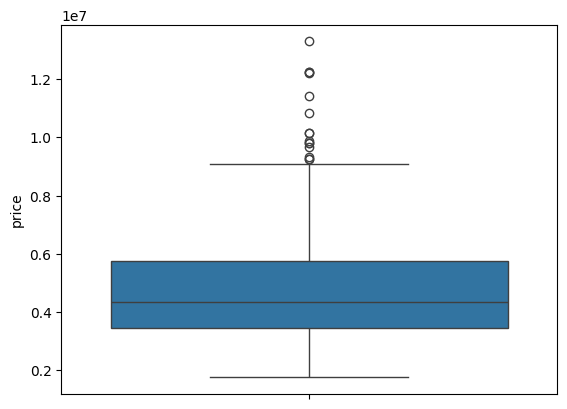

In [ ]:
# checking with visuals for outliers

sns.boxplot(data_m['price'])
plt.show()

In [ ]:
#checking for outliers for price

# Finding IQR

Q1= data_m['price'].quantile(0.25)
Q3= data_m['price'].quantile(0.75)
IQR= Q3-Q1

# Defining upper and lower thresholds
lowerthreshold = Q1-1.5*IQR
upperthreshold = Q3+1.5*IQR
outliers = data_m[(data_m ['price'] <lowerthreshold)|(data_m ['price']> upperthreshold)]
outliers


,price,size,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


The dataset was devoid of null values. However, upon visual inspection and analysis using interquartile ranges, we discovered the presence of outliers.

In [ ]:
# Capping outliers (replace values below the lower threshold with the value at the lower threshold and values above the upper threshold with the value at the upper threshold)

data_m['price'] = np.where(data_m['price'] < lowerthreshold, lowerthreshold,data_m['price'])
data_m['price'] = np.where(data_m['price'] > upperthreshold, upperthreshold, data_m['price'])


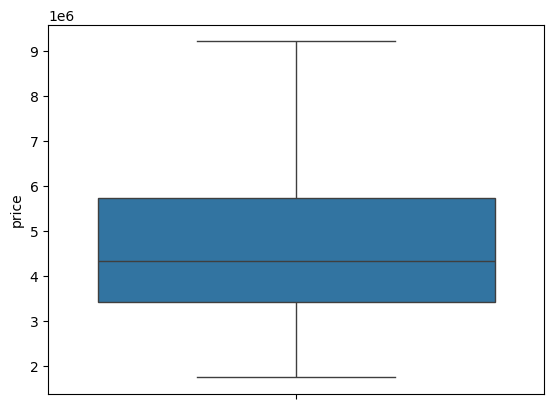

In [ ]:
# checking for outliers after cleaning
sns.boxplot(data_m['price'])
plt.show()


I've addressed all outliers in the price variable to ensure accurate data processing.

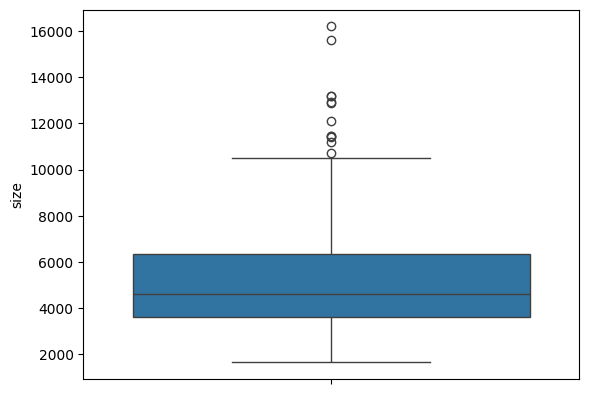

In [ ]:
#checking outliers for size

sns.boxplot(data_m['size'])
plt.show()

In [ ]:
#checking for outliers for size

# Finding IQR

Q1= data_m['size'].quantile(0.25)
Q3= data_m['size'].quantile(0.75)
IQR= Q3-Q1

# Defining upper and lower thresholds
lowerthreshold = Q1-1.5*IQR
upperthreshold = Q3+1.5*IQR
outliers = data_m[(data_m ['size'] <lowerthreshold)|(data_m ['size']> upperthreshold)]
outliers

,price,size,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,9205000.0,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9205000.0,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
56,7343000.0,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000.0,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000.0,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000.0,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
125,5943000.0,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
129,5873000.0,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
186,5110000.0,11410,2,1,2,yes,no,no,no,no,0,yes,furnished
191,5040000.0,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished


In [ ]:
# Capping outliers

data_m['size'] = np.where(data_m['size'] < lowerthreshold, lowerthreshold,data_m['size'])
data_m['size'] = np.where(data_m['size'] > upperthreshold, upperthreshold, data_m['size'])


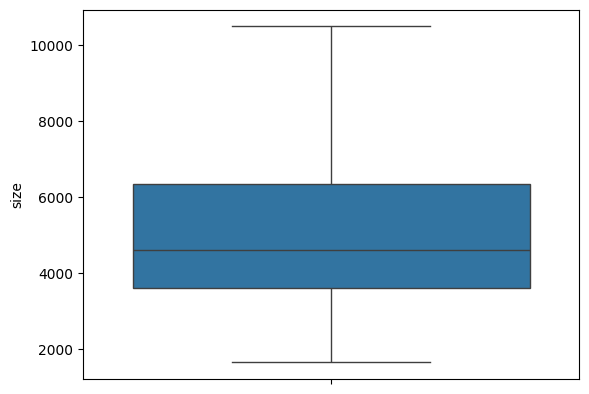

In [ ]:
# checking for outliers after cleaning
sns.boxplot(data_m['size'])
plt.show()


I've managed all outliers within the size variable to guarantee precise data processing.

## Label encoding

In [ ]:
#import from scikit-learn
from sklearn.preprocessing import LabelEncoder

#create an instance of LabelEncoder
encoding = LabelEncoder()

In [ ]:
#listing columns for encoding
encode_column=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for column in encode_column:
 data_m[column] = encoding.fit_transform(data_m[column])

In [ ]:
data_m.describe()

,price,size,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.727388e+06,5102.249541,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.745227e+06,2005.804353,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,9.205000e+06,10500.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


## Question 4: Feature Selection

In [ ]:
# checking for the shape
data_m.columns

Index(['price', 'size', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

#**Data Dictionary**

**Price:** Price of the House

**Size:** Area of a House

**Bedrooms:** Number of House Bedrooms

**Bathrooms:** Number if Bathrooms

**Stories:** Number of House Stories building

**Mainroad:** whetherit is connected to Main Road

**Guestroom:** Whether it has a guest room

**Basement:** Whether it has a basement

**Hotwaterheating:** Whether has a hotwater heater

**Airconditioning:** Whether has an airconditioning

**Parking:** Number of packing space in a house

**Prefrarea:** Preferable house area

**Furnishing:** Furnishing status of the House


In [ ]:
data_m.head()

,price,size,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000.0,7420.0,4,2,3,1,0,0,0,1,2,1,0
1,9205000.0,8960.0,4,4,4,1,0,0,0,1,3,0,0
2,9205000.0,9960.0,3,2,2,1,0,1,0,0,2,1,1
3,9205000.0,7500.0,4,2,2,1,0,1,0,1,3,1,0
4,9205000.0,7420.0,4,1,2,1,1,1,0,1,2,0,0


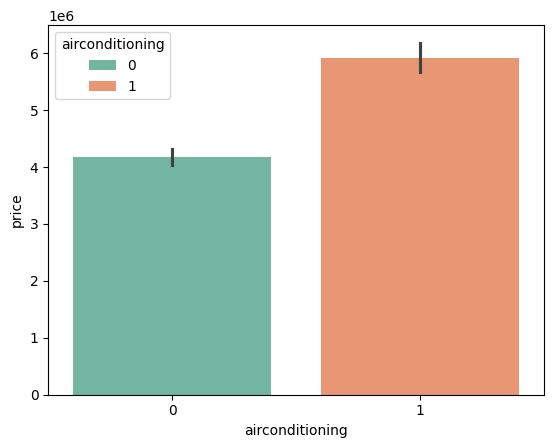

In [ ]:
#visualising
sns.barplot(x='airconditioning', y='price', hue= 'airconditioning', data=data_m, palette='Set2')
plt.show()

Rooms with air conditioning typically command higher prices, suggesting that affordability is inherently influenced by the quality of features.


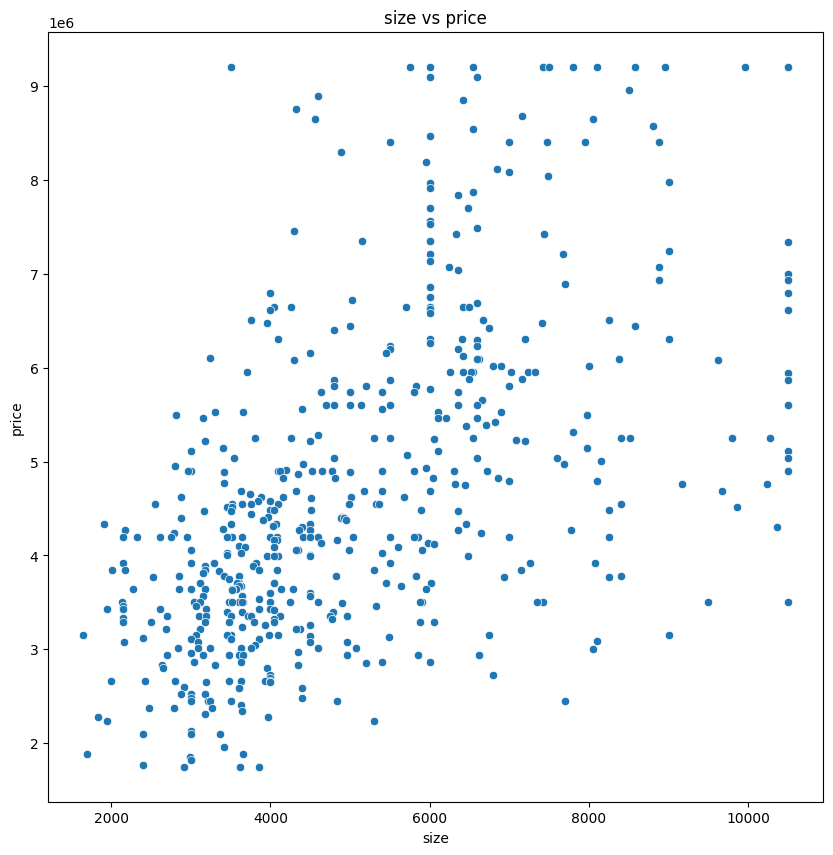

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = data_m, x="size", y="price")
plt.title('size vs price')
plt.show()

Houses within the range of 2000 to 4000 square feet are more sought after due to their pricing. Generally, as the size increases, so does the price.

In [ ]:
data_m['bedrooms'].value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

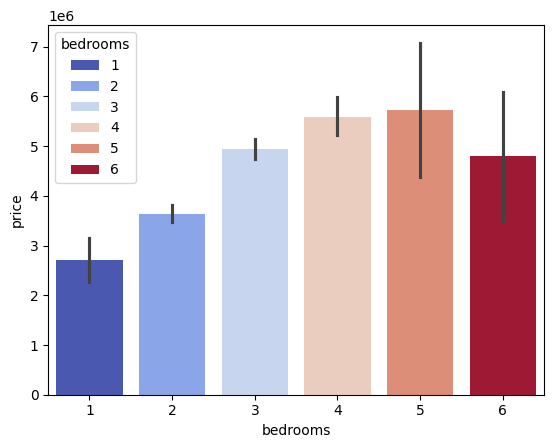

In [ ]:
sns.barplot(x='bedrooms', y='price', data=data_m, hue='bedrooms', palette='coolwarm')
plt.show()

This visualization indicates the necessity of considering additional factors for accurate interpretations. While one might expect houses with more bedrooms to command higher prices, the data does not consistently support this assumption.

In [ ]:
data_m['parking'].value_counts()

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

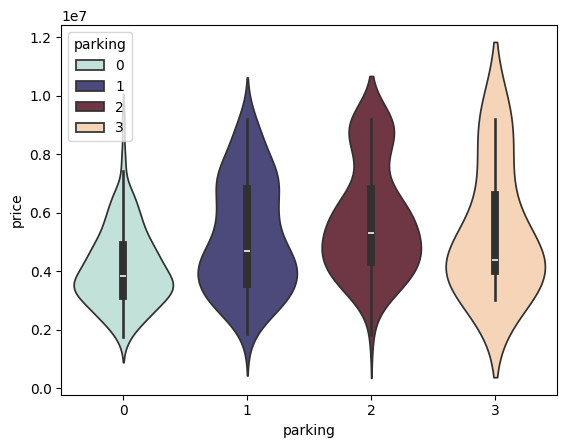

In [ ]:
plt.size = (10,10)
sns.violinplot(data = data_m, x='parking', y='price', hue='parking', palette ='icefire')
plt.show()

Houses with greater parking capacity tend to come with higher price tags compared to those with fewer parking spaces.

In [ ]:
data_m['bathrooms'].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

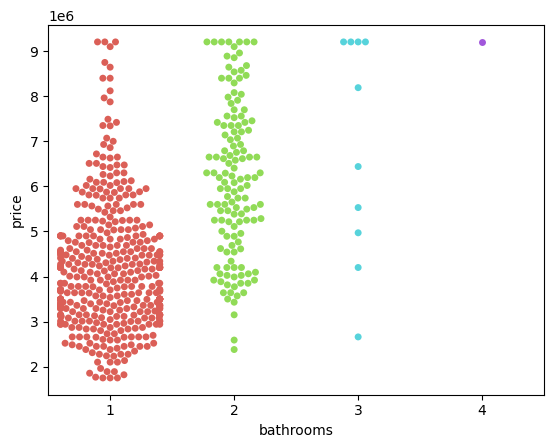

In [ ]:
sns.swarmplot( data=data_m, x='bathrooms', y='price', palette='hls')
plt.show()

Homes featuring only one bathroom are more frequently purchased due to their lower prices, whereas those with higher prices, typically associated with multiple bathrooms, are attracting fewer buyers.

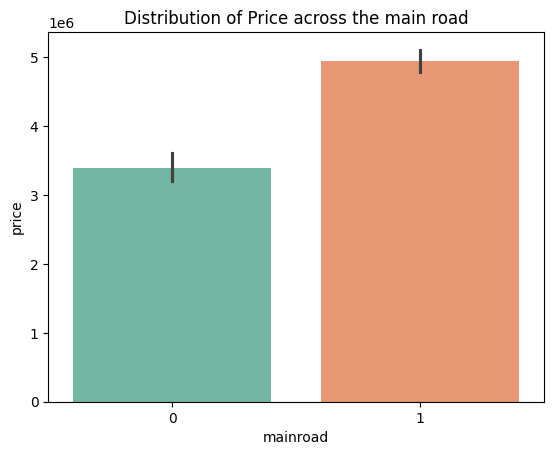

In [ ]:
sns.barplot(x='mainroad', y='price', data=data_m, palette='Set2')
plt.title('Distribution of Price across the main road')
plt.show()

Proximity to the main road confers a distinct advantage to houses, rendering them more expensive.

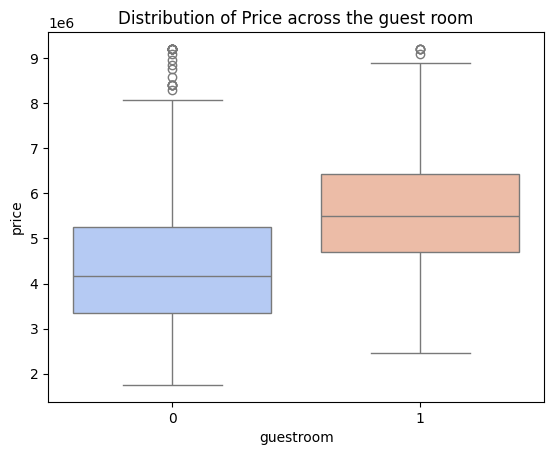

In [ ]:
sns.boxplot(x='guestroom', y='price', data=data_m, palette='coolwarm')
plt.title('Distribution of Price across the guest room')
plt.show()

Having a guest room tends to incur additional fees, so people opt for houses without one to better fit their budget.

## Question 5: Model training

Splitting my Data into x (features) and y (target)

In [ ]:
# Split the data into features (X) and target (y)

x = data_m[['size', 'bedrooms', 'bathrooms', 'stories', 'parking','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']]

In [ ]:
y = data_m['price']

In [ ]:
x.head()

,size,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,7420.0,4,2,3,2,1,0,0,0,1,1,0
1,8960.0,4,4,4,3,1,0,0,0,1,0,0
2,9960.0,3,2,2,2,1,0,1,0,0,1,1
3,7500.0,4,2,2,3,1,0,1,0,1,1,0
4,7420.0,4,1,2,2,1,1,1,0,1,0,0


Importing Linear regression from Library

In [ ]:
# To access and utilize the LinearRegression
from sklearn.linear_model import LinearRegression

# Create a LinearRegression model
model_m = LinearRegression()


model_m.fit(x, y)


LinearRegression()

In [ ]:
model_m.intercept_

240210.03565904777

In [ ]:
model_m.coef_

array([ 2.52228656e+02,  1.23361683e+05,  8.66078372e+05,  4.34953726e+05,
        2.20579334e+05,  4.45505355e+05,  3.31130729e+05,  3.41464775e+05,
        9.29557975e+05,  8.19367730e+05,  5.67677176e+05, -1.99626964e+05])

In [ ]:
# Predict prices for the original data points
y_pred= model_m.predict(x)
y_pred

array([ 7915920.24316294, 10124365.00036407,  7320735.70191981,
        8063188.91911064,  6719806.4736299 ,  7950745.58521712,
        9309910.61801511,  7019813.3321122 ,  7458999.13568275,
        7517587.89885456,  7609855.49704915,  8004361.80829886,
        6841321.289894  ,  6034743.25600906,  5993298.36285333,
        5011516.36030666,  7326901.26360168,  7932242.05748531,
        6409773.57813423,  6685169.88142095,  5393968.51015729,
        6561474.91615227,  6099815.78416464,  6520569.87363337,
        7138003.20295655,  7931600.8049946 ,  7901157.46802141,
        4616314.22742142,  7222733.30538861,  6917945.97684962,
        7274453.758373  ,  6488193.73827666,  6619726.3984321 ,
        6521146.70699908,  6476296.20287966,  7553899.07396775,
        7697807.64780153,  8181718.06855935,  6367468.84810413,
        7004825.8043116 ,  6172393.63973629,  7518991.24314186,
        7023486.24597302,  6406037.40829111,  7204452.76783259,
        6225931.06176897,  7081091.08459

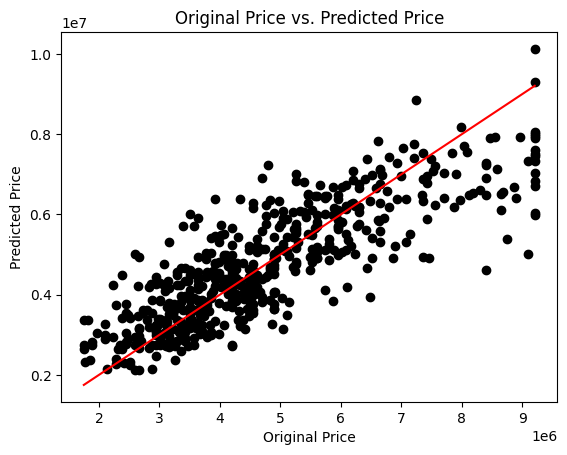

In [ ]:
# Plot original data points
plt.scatter(y, y_pred, color='black')

# Plot the line of best fit
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='-')
#(where y.min will return minimum value of y and y.max will return maximum value of y)

# Add labels and title
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.title('Original Price vs. Predicted Price')

# Show plot
plt.show()

The model's predicted price is remarkably impressive when compared to the original price.

## Question 5: Model Evaluation

In [ ]:
# evaluation with r2 score
from sklearn.metrics import r2_score

#calculate r2 score
r2_m = r2_score (y,y_pred)
print(r2_m)

0.690545377207932


In [ ]:
# Using mean squared error
from sklearn.metrics import mean_squared_error

#calculate mean squared error
mse_m = mean_squared_error(y, y_pred)
print(mse_m)

940813077772.8135


In [ ]:
data_m['price'].max()

9205000.0

In [ ]:
data_m['price'].min()

1750000.0

# Question 6: Documentation

# Facts and Findings:

1.	Data Quality: The dataset is clean and reliable, with no missing values or duplicates. Outliers were identified and adjusted to improve the analysis.


2.	Price Factors: Housing prices are primarily determined by quality features and individual preferences. Prices vary widely, ranging from 1,750,000 to 13,300,000


3.	Feature Availability: The features available to buyers depend on both their budget and personal preferences. This highlights how financial constraints and individual tastes shape housing options.


Conclusion
In conclusion, the housing packages within the dataset offers diverse housing options tailored to different needs and budgets. By considering both financial limitations and personal preferences, buyers can make informed decisions that suit their requirements. This emphasizes the flexibility of the housing market in meeting the needs of various socioeconomic groups.

